# Housing Price Analisis

### Data fields

+ SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
+ MSSubClass: The building class
+ MSZoning: The general zoning classification
+ LotFrontage: Linear feet of street connected to property
+ LotArea: Lot size in square feet
+ Street: Type of road access
+ Alley: Type of alley access
+ LotShape: General shape of property
+ LandContour: Flatness of the property
+ Utilities: Type of utilities available
+ LotConfig: Lot configuration
+ LandSlope: Slope of property
+ Neighborhood: Physical locations within Ames city limits
+ Condition1: Proximity to main road or railroad
+ Condition2: Proximity to main road or railroad (if a second is present)
+ BldgType: Type of dwelling
+ HouseStyle: Style of dwelling
+ OverallQual: Overall material and finish quality
+ OverallCond: Overall condition rating
+ YearBuilt: Original construction date
+ YearRemodAdd: Remodel date
+ RoofStyle: Type of roof
+ RoofMatl: Roof material
+ Exterior1st: Exterior covering on house
+ Exterior2nd: Exterior covering on house (if more than one material)
+ MasVnrType: Masonry veneer type
+ MasVnrArea: Masonry veneer area in square feet
+ ExterQual: Exterior material quality
+ ExterCond: Present condition of the material on the exterior
+ Foundation: Type of foundation
+ BsmtQual: Height of the basement
+ BsmtCond: General condition of the basement
+ BsmtExposure: Walkout or garden level basement walls
+ BsmtFinType1: Quality of basement finished area
+ BsmtFinSF1: Type 1 finished square feet
+ BsmtFinType2: Quality of second finished area (if present)
+ BsmtFinSF2: Type 2 finished square feet
+ BsmtUnfSF: Unfinished square feet of basement area
+ TotalBsmtSF: Total square feet of basement area
+ Heating: Type of heating
+ HeatingQC: Heating quality and condition
+ CentralAir: Central air conditioning
+ Electrical: Electrical system
+ 1stFlrSF: First Floor square feet
+ 2ndFlrSF: Second floor square feet
+ LowQualFinSF: Low quality finished square feet (all floors)
+ GrLivArea: Above grade (ground) living area square feet
+ BsmtFullBath: Basement full bathrooms
+ BsmtHalfBath: Basement half bathrooms
+ FullBath: Full bathrooms above grade
+ HalfBath: Half baths above grade
+ Bedroom: Number of bedrooms above basement level
+ Kitchen: Number of kitchens
+ KitchenQual: Kitchen quality
+ TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
+ Functional: Home functionality rating
+ Fireplaces: Number of fireplaces
+ FireplaceQu: Fireplace quality
+ GarageType: Garage location
+ GarageYrBlt: Year garage was built
+ GarageFinish: Interior finish of the garage
+ GarageCars: Size of garage in car capacity
+ GarageArea: Size of garage in square feet
+ GarageQual: Garage quality
+ GarageCond: Garage condition
+ PavedDrive: Paved driveway
+ WoodDeckSF: Wood deck area in square feet
+ OpenPorchSF: Open porch area in square feet
+ EnclosedPorch: Enclosed porch area in square feet
+ 3SsnPorch: Three season porch area in square feet
+ ScreenPorch: Screen porch area in square feet
+ PoolArea: Pool area in square feet
+ PoolQC: Pool quality
+ Fence: Fence quality
+ MiscFeature: Miscellaneous feature not covered in other categories
+ MiscVal: $Value of miscellaneous feature
+ MoSold: Month Sold
+ YrSold: Year Sold
+ SaleType: Type of sale
+ SaleCondition: Condition of sale

In [1]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
# Read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## EDA

In [3]:
# Printing shape and head 
print(train_df.shape)
train_df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Printing info
train_df.info()

# Getting the null values per feature
train_df.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


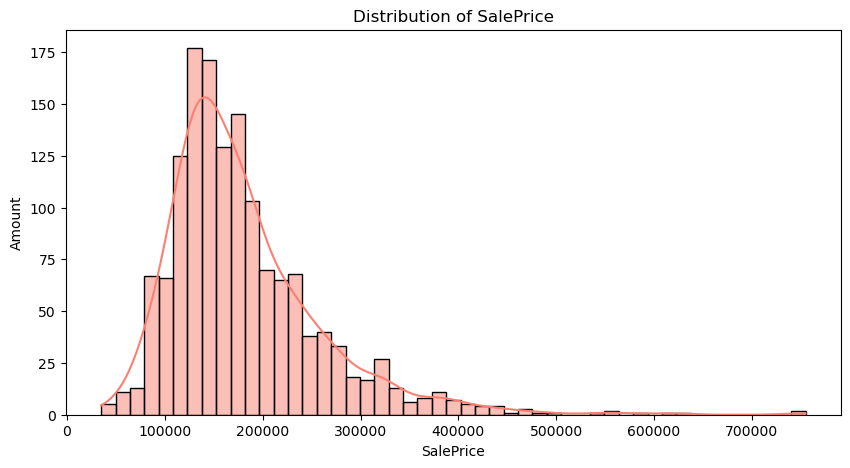

In [6]:
# Distribution on 'SalesPrice'
plt.figure(figsize=(10, 5))
sns.histplot(train_df['SalePrice'], kde=True, color='salmon')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Amount')
plt.show()

In [7]:
# Correlation between numeric features and 'SalesPrice'
correlation = train_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
correlation.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

[('PoolQC', 288010.0), ('ExterQual', 279375.7472527473), ('RoofMatl', 253250.0), ('Neighborhood', 236718.84648493544), ('Condition2', 228250.0), ('KitchenQual', 222989.46487179486), ('Exterior2nd', 214000.0), ('BsmtQual', 211349.0127508855), ('FireplaceQu', 207948.35), ('Exterior1st', 191000.0)]


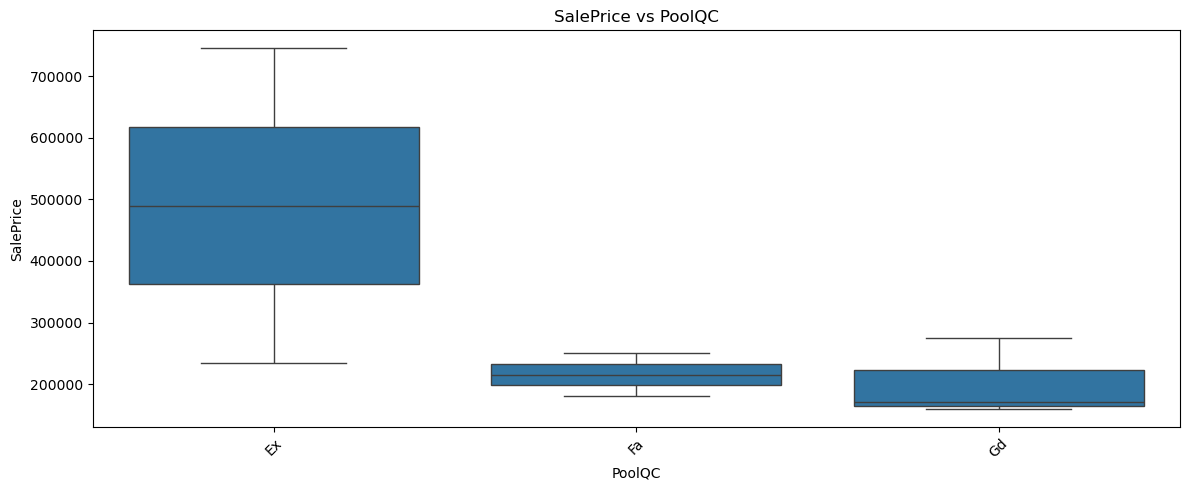

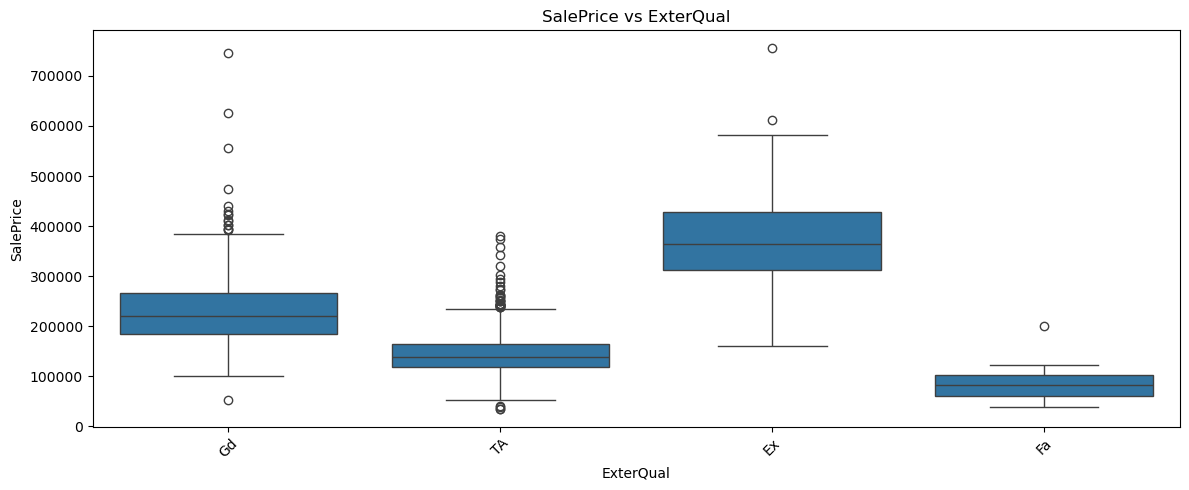

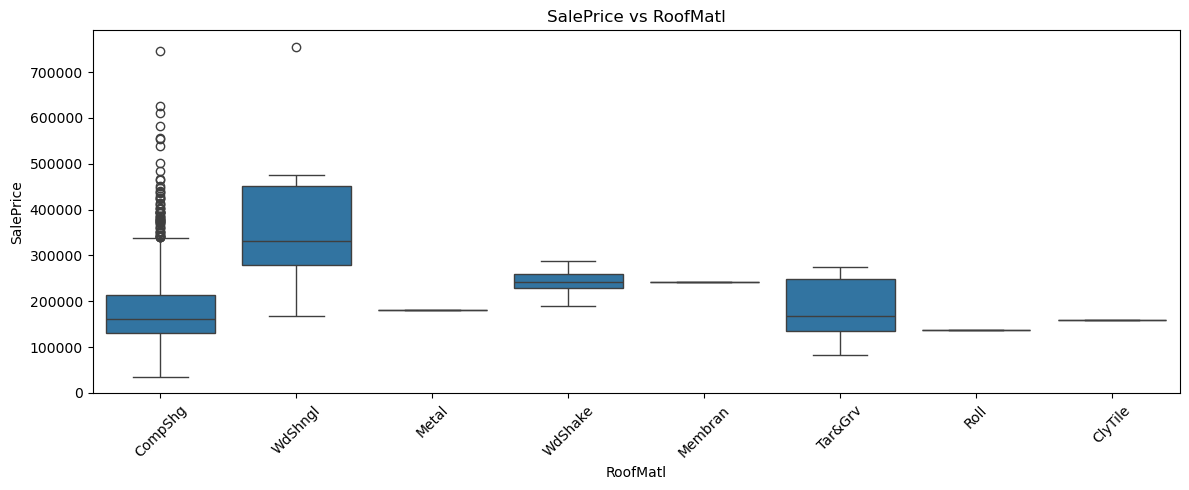

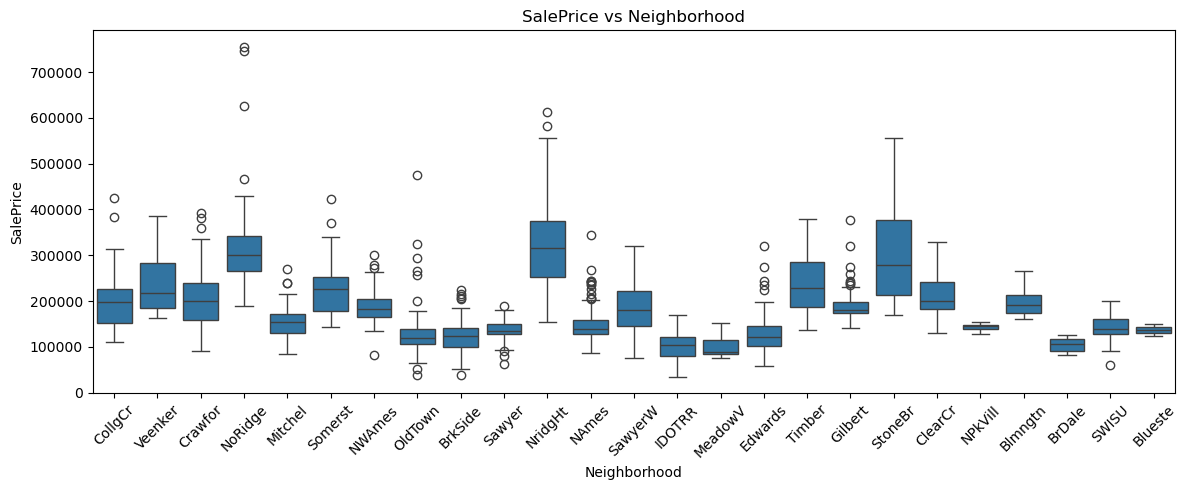

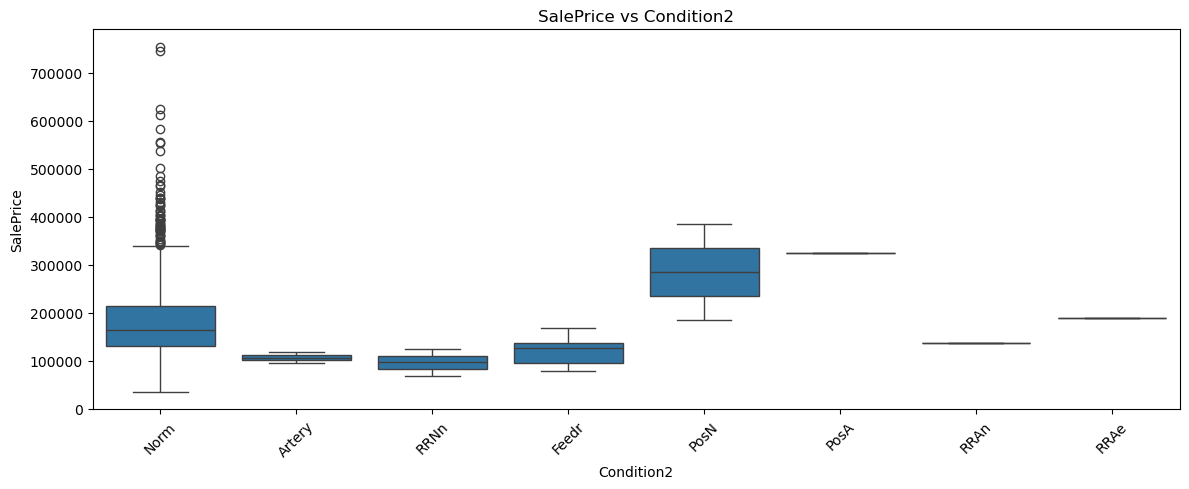

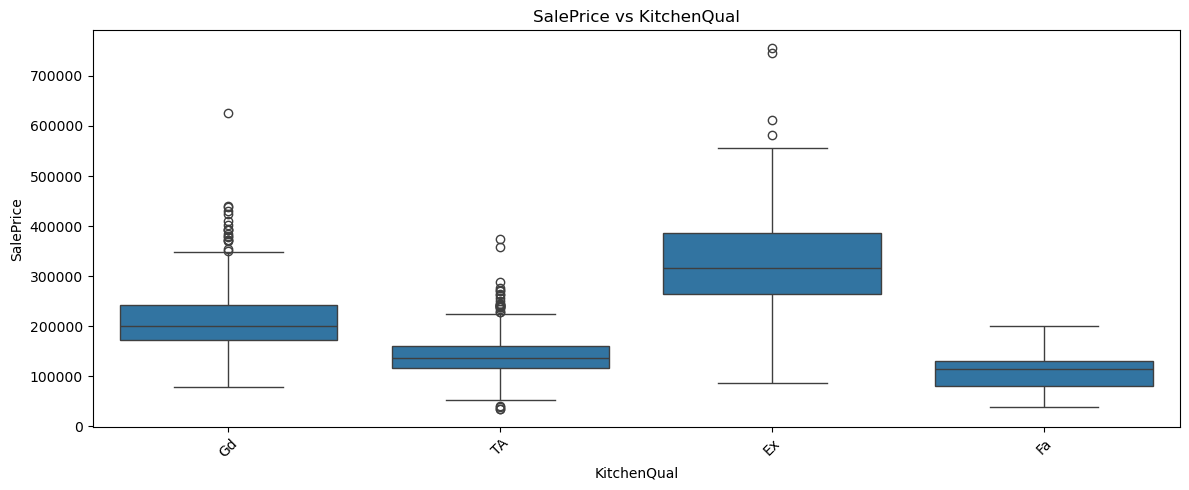

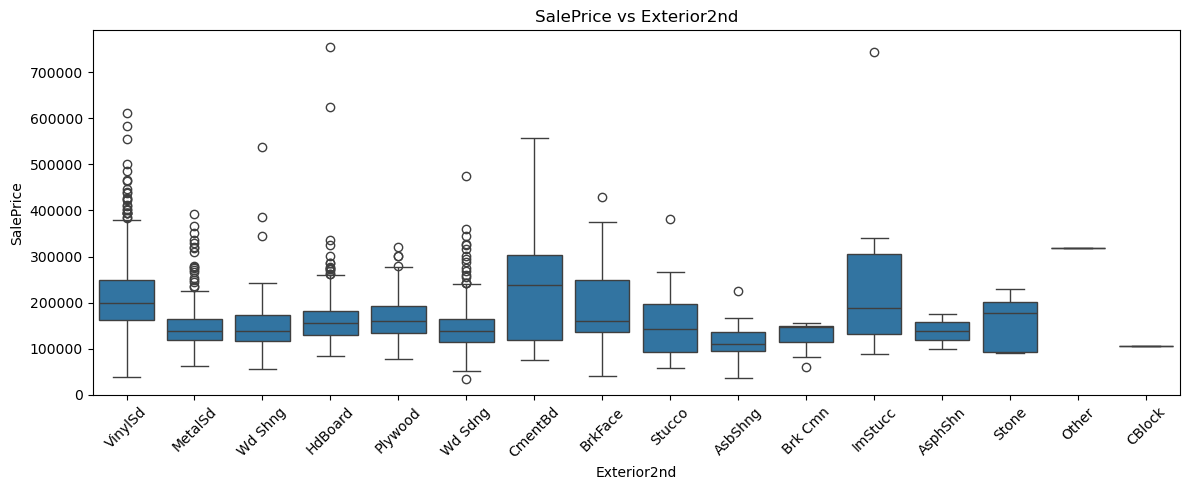

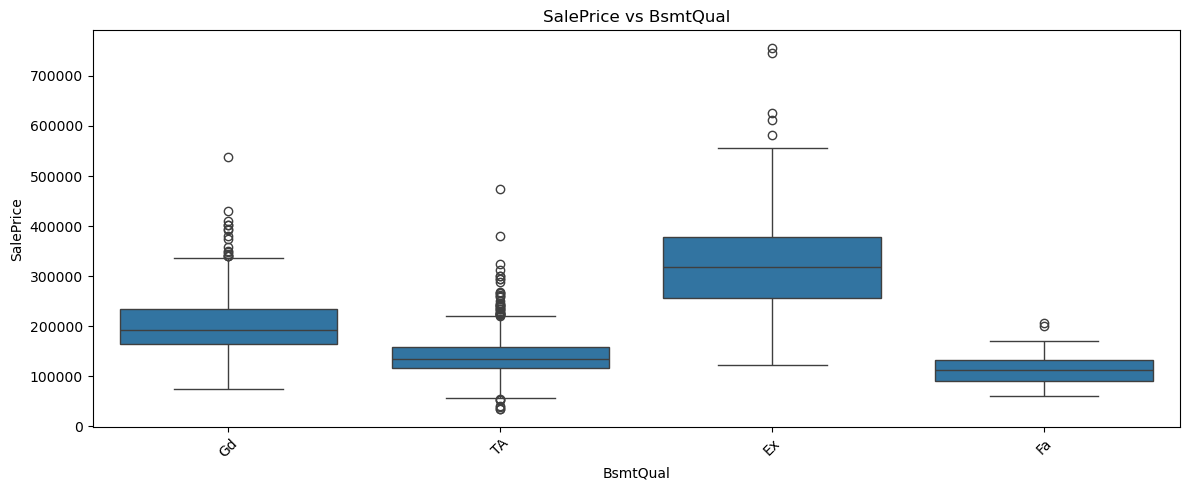

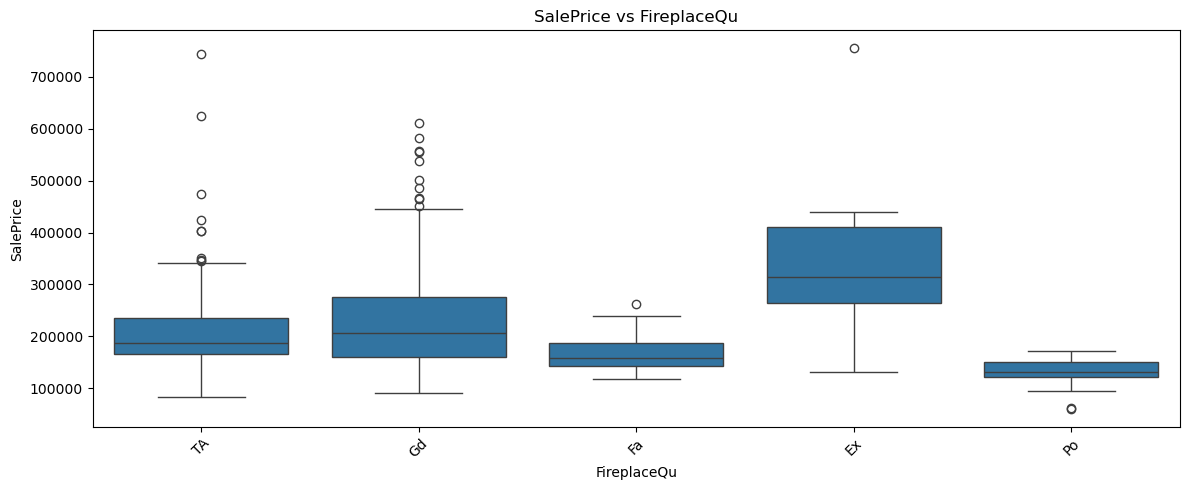

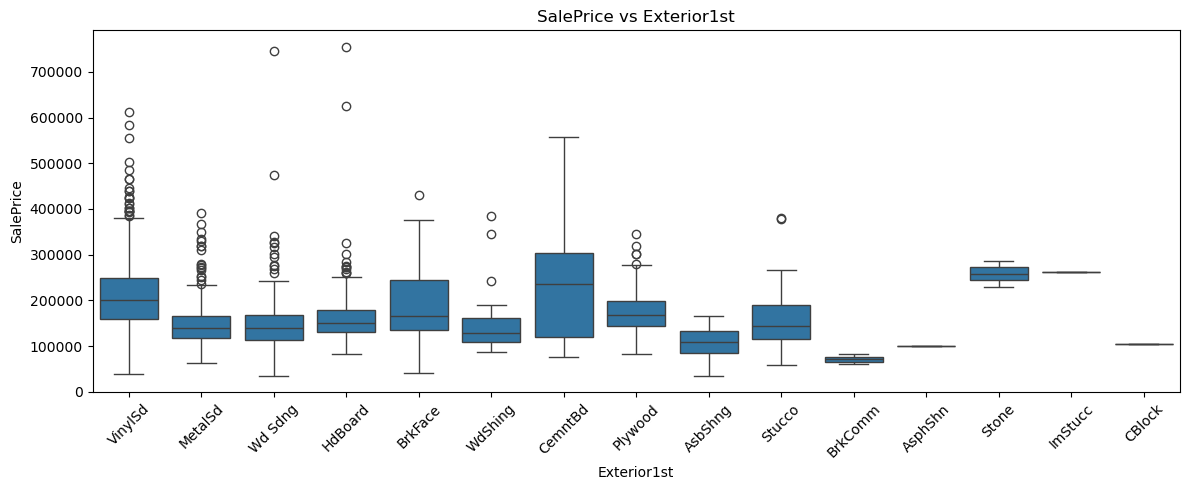


PoolQC - Unique categories: 3
PoolQC
Gd    0.428571
Ex    0.285714
Fa    0.285714
Name: proportion, dtype: float64

ExterQual - Unique categories: 4
ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: proportion, dtype: float64

RoofMatl - Unique categories: 8
RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Name: proportion, dtype: float64

Neighborhood - Unique categories: 25
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Name: proportion, dtype: float64

Condition2 - Unique categories: 8
Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
Name: proportion, dtype: float64

KitchenQual - Unique categories: 4
KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: proportion, dtype: float64

Exterior2nd - Unique categories: 16
Exterior2nd
VinylSd    0.345205
Meta

In [8]:
cat_cols = train_df.select_dtypes(include='object').columns
impact_scores = {}

for col in cat_cols:
    grouped = train_df.groupby(col)['SalePrice'].mean()
    score = grouped.max() - grouped.min()
    impact_scores[col] = score

# Top 10 categories with the most impact
top10_cat = sorted(impact_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Printing top 10
print(f'{top10_cat}')

# Visualizing top 10 cat with SalePrice
top10_cat_cols = [col for col, _ in top10_cat]

for col in top10_cat_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(data=train_df, x=col, y='SalePrice')
    plt.xticks(rotation=45)
    plt.title(f'SalePrice vs {col}')
    plt.tight_layout()
    plt.show()

# Printing unique values per cat feature in top 10
for col in top10_cat_cols:
    print(f"\n{col} - Unique categories: {train_df[col].nunique()}")
    print(train_df[col].value_counts(normalize=True).head(5))

###  Interpretation of Top Categorical Features by Impact on >SalePrice<

#### 1. **PoolQC (Pool Quality) –  Max difference: $288,010**
- **Note**: This has **massive influence**, but **almost all values are missing** (~99%).
-  Interpretation: A house with a high-quality pool adds huge value — but because pools are rare, this feature might only be helpful if we handle it.

#### 2. **ExterQual (Exterior Material Quality) –  Max difference: $279,376**
-  Strong, consistent influence on price.
-  Interpretation: Higher exterior quality (e.g., 'Excellent' vs 'Fair') leads to much higher sale prices.

#### 3. **RoofMatl (Roof Material) –  Max difference: $253,250**
-  Likely due to one or two rare materials with very high-value homes.
-  Interpretation: Some roof types (like metal or premium tile) may be associated with luxury homes.

#### 4. **Neighborhood –  Max difference: $236,719**
-  One of the **most important location-related features**.
-  Interpretation: Certain neighborhoods consistently sell at higher prices.

#### 5. **Condition2 –  Max difference: $228,250**
-  Often used for rare conditions (e.g., adjacent to railroads, greenbelts).
-  Interpretation: Some rare condition values seem to indicate **premium land features**.

#### 6. **KitchenQual –  Max difference: $222,989**
-  Highly predictive of value (kitchen = huge selling point).
-  Interpretation: Better kitchen quality directly boosts sale price.

#### 7. **Exterior2nd –  Max difference: $214,000**
- Similar to 'Exterior1st', may contain **too many categories**.
- Interpretation: Some secondary materials are associated with luxury homes.

#### 8. **BsmtQual –  Max difference: $211,349**
- Basement quality is very impactful.
- Interpretation: Homes with high-quality basements sell significantly higher.

#### 9. **FireplaceQu – Max difference: $207,948**
- Many nulls, but valuable when present.
- Interpretation: Fireplace quality adds serious value — even more than just fireplace presence.

#### 10. **Exterior1st –  Max difference: $191,000**
-  Similar to Exterior2nd; can help capture facade quality/style.


### Final Thoughts

These features highlight **key home aspects buyers care about**:
- Location (`Neighborhood`)
- Construction quality (`ExterQual`, `BsmtQual`)
- Interior appeal (`KitchenQual`, `FireplaceQu`)
- Materials and extras (`RoofMatl`, `Exterior1st/2nd`, `PoolQC`)

## Preprocessing the Dataframe

In [9]:
# Handling null values 

# Dropping features with a high % of null values
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train_df.drop(columns=cols_to_drop, inplace=True)

# Imputing nulls with None in categorical features
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
others_with_none = ['FireplaceQu', 'MasVnrType']

for col in garage_cols + bsmt_cols + others_with_none:
    train_df[col] = train_df[col].fillna("None")

# Imputing nulls with 0 in numerical features
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

# Electrical has only 1 missing value , filling with mode 
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

# Imputing 'LotFrontage' using median based on the Neighborhood
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# # Confirming there is not any null values left 
# train_df.isnull().sum().sum()  

In [10]:
# Getting features that are represented by the smae value in their majority
for col in train_df.select_dtypes(include='object').columns:
    top_freq = train_df[col].value_counts(normalize=True).values[0]
    if top_freq > 0.95:
        print(f"{col} → Dominant: {top_freq:.2%}")

# Getting features with the most unique values
for col in train_df.select_dtypes(include='object').columns:
    num_unique = train_df[col].nunique()
    if num_unique > 10:
        print(f"{col}: {num_unique} unique categories")


Street → Dominant: 99.59%
Utilities → Dominant: 99.93%
Condition2 → Dominant: 98.97%
RoofMatl → Dominant: 98.22%
Heating → Dominant: 97.81%
Neighborhood: 25 unique categories
Exterior1st: 15 unique categories
Exterior2nd: 16 unique categories


### Columns to Drop (Low Variance)
These columns have a dominant single value in over 97% of the records, meaning they carry little to no predictive power:

Column, Dominant Category, % Dominant
+ Street, Pave, 99.59%
+ Utilities, AllPub, 99.93%
+ Condition2, Norm, 98.97%
+ RoofMatl, CompShg, 98.22%

In [11]:
# Dropping features with a high variance 
cols_to_drop_low_variance = ['Street', 'Utilities', 'Condition2', 'RoofMatl']
train_df.drop(columns=cols_to_drop_low_variance, inplace=True)

In [12]:
# Grouping low frequency categories
def group_rare_categories(df, column, threshold=50): # just if they appear in 50 houses at least
    freq = df[column].value_counts()
    to_replace = freq[freq < threshold].index
    df[column] = df[column].replace(to_replace, "Other") # the rest go to 'other' 
    return df

# Apply to both columns
train_df = group_rare_categories(train_df, 'Exterior1st')
train_df = group_rare_categories(train_df, 'Exterior2nd')

In [13]:
#  Ordinal Encoding

# Mapping for quality ratings
qual_map = {
    'None': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

# List of ordinal columns
ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond'
]

# Apply mapping
for col in ordinal_cols:
    train_df[col] = train_df[col].map(qual_map)

In [14]:
# One hot encoding 

# List of nominal columns to encode
nominal_cols = [
    'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
    'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
    'Electrical', 'Functional', 'GarageType', 'GarageFinish',
    'PavedDrive', 'SaleType', 'SaleCondition'
]

# Apply one-hot encoding
train_df = pd.get_dummies(train_df, columns=nominal_cols, drop_first=True)

## Training the Model - `Linear Regression`

In [15]:
# Transform target to handle the outliers 
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

train_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,False,False,False,False,True,False,False,False,True,False


In [16]:
# Separate target and features
X = train_df.drop(['Id','SalePrice'], axis=1)
y = train_df['SalePrice']

encoder_cols = X.columns.tolist()

# Split 80% train / 20% test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_log = lin_reg.predict(X_valid)

# Calculate RMSE on log scale (as per competition metric)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred_log))
print(f"Linear Regression RMSE (log scale): {rmse:.4f}")

# R² score (explained variance)
train_score = lin_reg.score(X_train, y_train)
valid_score = lin_reg.score(X_valid, y_valid)

print(f"Linear Regression R² on training set: {train_score:.4f}")
print(f"Linear Regression R² on validation set: {valid_score:.4f}")

Linear Regression RMSE (log scale): 0.1291
Linear Regression R² on training set: 0.9194
Linear Regression R² on validation set: 0.9106


## Training the Model - `Linear Regression USING PCA`

In [18]:
# Scaling features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

print(f"Original shape: {X_train.shape}")
print(f"Reduced shape after PCA: {X_train_pca.shape}")

# Train Linear Regression on PCA-transformed data
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)

y_pred_pca = lin_reg_pca.predict(X_valid_pca)
rmse_pca = np.sqrt(mean_squared_error(y_valid, y_pred_pca))
print(f"Linear Regression RMSE with PCA: {rmse_pca:.4f}")

# R² for Linear Regression with PCA
train_score_pca = lin_reg_pca.score(X_train_pca, y_train)
valid_score_pca = lin_reg_pca.score(X_valid_pca, y_valid)

print(f"Linear Regression R² (train, PCA): {train_score_pca:.4f}")
print(f"Linear Regression R² (valid, PCA): {valid_score_pca:.4f}")

Original shape: (1168, 186)
Reduced shape after PCA: (1168, 120)
Linear Regression RMSE with PCA: 0.1480
Linear Regression R² (train, PCA): 0.8996
Linear Regression R² (valid, PCA): 0.8827


## Training the Model - `Random Forest`

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model (you can tune later)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on validation set
y_pred_rf = rf.predict(X_valid)

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_valid, y_pred_rf))
print(f"Random Forest RMSE (log scale): {rmse_rf:.4f}")

# R² scores
train_r2_rf = rf.score(X_train, y_train)
valid_r2_rf = rf.score(X_valid, y_valid)

print(f"Random Forest R² (train): {train_r2_rf:.4f}")
print(f"Random Forest R² (valid): {valid_r2_rf:.4f}")

Random Forest RMSE (log scale): 0.1468
Random Forest R² (train): 0.9816
Random Forest R² (valid): 0.8845


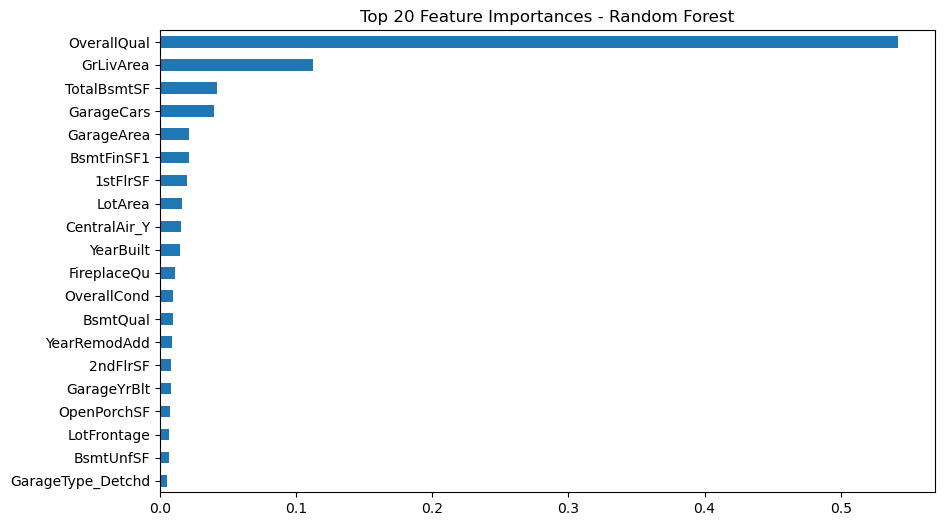

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feat_importances.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title('Top 20 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()

## Conclusions 

## Final Model Comparison – House Prices Regression

After preprocessing and modeling, three regression approaches were tested: Linear Regression, Linear Regression with PCA, and Random Forest. Below is a summary of their performance on log-transformed target values, evaluated using RMSE and R².

| Model                   | RMSE (Log Scale) | R² Train | R² Validation | Notes |
|-------------------------|------------------|----------|----------------|-------|
| **Linear Regression**   | **0.1291**        | 0.9194   | **0.9106**     | Best validation performance. Strong generalization. |
| **Linear Regression + PCA** | 0.1480       | 0.8996   | 0.8827         | Slightly worse due to dimensionality reduction. |
| **Random Forest**       | 0.1468           | **0.9816** | 0.8845        | Overfits the training data. Good but less generalizable than Linear Regression. |

---

### Key findings:

- **Linear Regression without PCA** remains the top-performing model with the lowest validation RMSE and a strong balance between train and validation R².
- **Random Forest** shows excellent performance on training data, but slightly overfits and underperforms on validation compared to linear regression.
- **PCA** helped reduce dimensionality but led to a small drop in predictive power.


## Preparing Submission to KAGGLE set

In [24]:
def preprocess_data(df, is_train=True, encoder=None, ordinal_cols=None):
    df = df.copy()

    # Drop high-null columns
    cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

    # Fill with 'None'
    garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
    bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    others_with_none = ['FireplaceQu', 'MasVnrType']
    for col in garage_cols + bsmt_cols + others_with_none:
        df[col] = df[col].fillna("None")

    # Fill numerical with 0
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

    # Electrical with mode
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    # LotFrontage by Neighborhood
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # Drop low-variance columns
    cols_to_drop_low_variance = ['Street', 'Utilities', 'Condition2', 'RoofMatl']
    df.drop(columns=cols_to_drop_low_variance, inplace=True, errors='ignore')

    # Group rare categories
    def group_rare_categories(df, column, threshold=50):
        freq = df[column].value_counts()
        to_replace = freq[freq < threshold].index
        df[column] = df[column].replace(to_replace, "Other")
        return df

    df = group_rare_categories(df, 'Exterior1st')
    df = group_rare_categories(df, 'Exterior2nd')

    # Ordinal encoding
    qual_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    if ordinal_cols is None:
        ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                        'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
    for col in ordinal_cols:
        df[col] = df[col].map(qual_map)

    # One-hot encoding
    nominal_cols = [
        'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
        'Electrical', 'Functional', 'GarageType', 'GarageFinish',
        'PavedDrive', 'SaleType', 'SaleCondition'
    ]
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

    # As a final step in test set, fill any remaining NaNs
    if not is_train:
        df = df.fillna(df.median(numeric_only=True))

    # Align with train columns
    if not is_train and encoder is not None:
        df = df.reindex(columns=encoder, fill_value=0)

    return df

In [25]:
test_df = pd.read_csv('test.csv')
test_ids = test_df['Id']  # Save IDs for final submission

# Preprocess test data using your function
test_df_processed = preprocess_data(test_df, is_train=False, encoder=encoder_cols)

# Make predictions using your trained model
test_predictions_log = lin_reg.predict(test_df_processed)
test_predictions = np.expm1(test_predictions_log)  # Convert back from log scale

# Create the submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)